# Dealing with Categorical Variables - Lab

## Introduction

In this lab, you'll explore the Ames Housing dataset and identify numeric and categorical variables. Then you'll transform some categorical data and use it in a multiple regression model.

## Objectives

You will be able to:

* Determine whether variables are categorical or numeric
* Use one-hot encoding to create dummy variables

## Step 1: Load the Ames Housing Dataset

Import `pandas`, and use it to load the file `ames.csv` into a dataframe called `ames`. If you pass in the argument `index_col=0` this will set the "Id" feature as the index.

In [3]:
# Your code here - load the dataset
import pandas as pd
ames = pd.read_csv('ames.csv', index_col=0)
ames

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


Visually inspect `ames` (it's ok if you can't see all of the columns).

In [4]:
# Your code here
ames.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

Go ahead and drop all **columns** with missing data, to simplify the problem. Remember that you can use the `dropna` method ([documentation here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html)).

In [5]:
# Your code here - drop columns with missing data
ames_clean = ames.dropna(axis=1)
ames_clean

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,2,2008,WD,Normal,208500
2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,0,0,5,2007,WD,Normal,181500
3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,9,2008,WD,Normal,223500
4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,...,0,0,0,0,0,8,2007,WD,Normal,175000
1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,...,0,0,0,0,0,2,2010,WD,Normal,210000
1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,...,0,0,0,0,2500,5,2010,WD,Normal,266500


## Step 2: Identify Numeric and Categorical Variables

The file `data_description.txt`, located in this repository, has a full description of all variables.

Using this file as well as `pandas` techniques, identify the following predictors:

1. A **continuous numeric** predictor
2. A **discrete numeric** predictor
3. A **string categorical** predictor
4. A **discrete categorical** predictor

(Note that `SalePrice` is the target variable and should not be selected as a predictor.)

For each of these predictors, visualize the relationship between the predictor and `SalePrice` using an appropriate plot.

Finding these will take some digging -- don't be discouraged if they're not immediately obvious. The Ames Housing dataset is a lot more complex than the Auto MPG dataset. There is also no single right answer here.

### Continuous Numeric Predictor

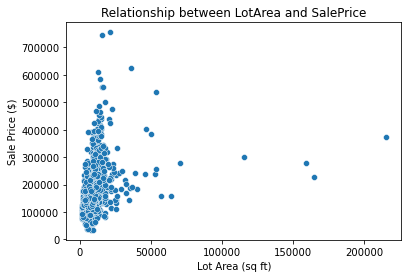

In [8]:
# Your code here - continuous numeric predictor
numeric_cols = ames_clean.select_dtypes(include=['int64', 'float64']).columns

import matplotlib.pyplot as plt
import seaborn as sns

# Select continuous numeric predictor (LotArea)
sns.scatterplot(x=ames_clean['LotArea'], y=ames_clean['SalePrice'])
plt.title('Relationship between LotArea and SalePrice')
plt.xlabel('Lot Area (sq ft)')
plt.ylabel('Sale Price ($)')
plt.show()


### Discrete Numeric Predictor

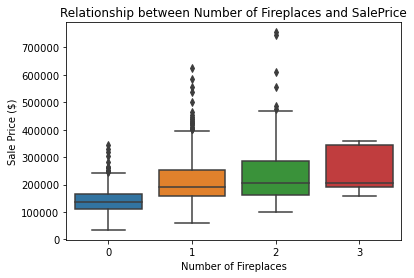

In [9]:
# Your code here - discrete numeric predictor
# Discrete numeric predictor: Fireplaces
sns.boxplot(x=ames_clean['Fireplaces'], y=ames_clean['SalePrice'])
plt.title('Relationship between Number of Fireplaces and SalePrice')
plt.xlabel('Number of Fireplaces')
plt.ylabel('Sale Price ($)')
plt.show()


### String Categorical Predictor

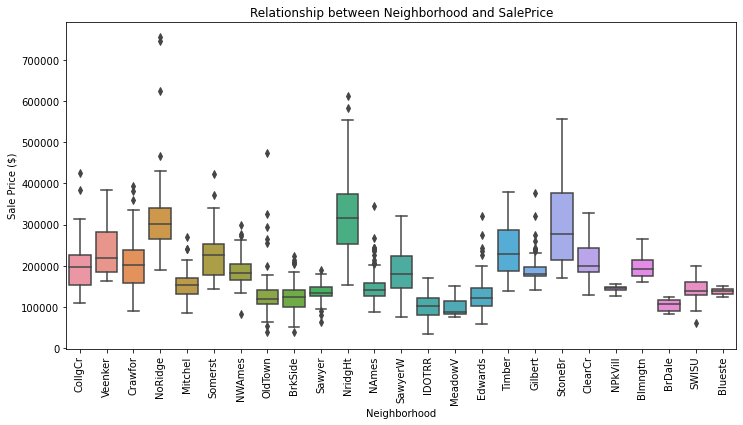

In [10]:
# Your code here - string categorical predictor
# String categorical predictor: Neighborhood
plt.figure(figsize=(12,6))
sns.boxplot(x=ames_clean['Neighborhood'], y=ames_clean['SalePrice'])
plt.title('Relationship between Neighborhood and SalePrice')
plt.xlabel('Neighborhood')
plt.ylabel('Sale Price ($)')
plt.xticks(rotation=90)  
plt.show()


### Discrete Categorical Predictor

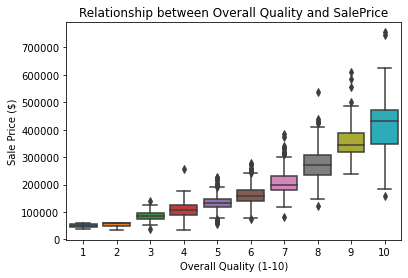

In [11]:
# Your code here - discrete categorical predictor
# Discrete categorical predictor: OverallQual
sns.boxplot(x=ames_clean['OverallQual'], y=ames_clean['SalePrice'])
plt.title('Relationship between Overall Quality and SalePrice')
plt.xlabel('Overall Quality (1-10)')
plt.ylabel('Sale Price ($)')
plt.show()


## Step 3: Build a Multiple Regression Model with Your Chosen Predictors

Choose the best-looking 3 out of 4 predictors to include in your model.

Make sure that you one-hot encode your categorical predictor(s) (regardless of whether the current data type is a string or number) first.

In [12]:
# Your code here - prepare X and y, including one-hot encoding
# Define the target variable (SalePrice)
y = ames_clean['SalePrice']

# Select the predictors (LotArea, Fireplaces, OverallQual, and Neighborhood)
X = ames_clean[['LotArea', 'Fireplaces', 'OverallQual', 'Neighborhood']]

# One-hot encode the categorical variable (Neighborhood)
X_encoded = pd.get_dummies(X, drop_first=True)

# Inspect the encoded features
X_encoded.head()


,LotArea,Fireplaces,OverallQual,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
Id,,,,,,,,,,,,,,,,,,,,,
1,8450,0,7,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9600,1,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,11250,1,7,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9550,1,7,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,14260,1,8,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [13]:
# Your answer here - which category or categories were dropped?
print(X_encoded.columns)


Index(['LotArea', 'Fireplaces', 'OverallQual', 'Neighborhood_Blueste',
       'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr',
       'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards',
       'Neighborhood_Gilbert', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV',
       'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NPkVill',
       'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Sawyer',
       'Neighborhood_SawyerW', 'Neighborhood_Somerst', 'Neighborhood_StoneBr',
       'Neighborhood_Timber', 'Neighborhood_Veenker'],
      dtype='object')


In [14]:
# Your code here - build a regression model and display results
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize the regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the model's coefficients and evaluation metrics
print("Model Coefficients:")
for feature, coef in zip(X_encoded.columns, model.coef_):
    print(f"{feature}: {coef}")

print(f"\nMean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")


Model Coefficients:
LotArea: 0.9460067146679515
Fireplaces: 16483.03580961014
OverallQual: 29439.54378154584
Neighborhood_Blueste: -31328.75681824247
Neighborhood_BrDale: -32887.42139508487
Neighborhood_BrkSide: 197.70130389142594
Neighborhood_ClearCr: 36483.06234614544
Neighborhood_CollgCr: 27677.818212344315
Neighborhood_Crawfor: 31979.359321201686
Neighborhood_Edwards: 1832.3936281582337
Neighborhood_Gilbert: 14588.597694332733
Neighborhood_IDOTRR: -12441.531431289173
Neighborhood_MeadowV: 2602.0843589694377
Neighborhood_Mitchel: 14535.246722124204
Neighborhood_NAmes: 7455.635676561643
Neighborhood_NPkVill: -8116.312000961988
Neighborhood_NWAmes: 13666.601930190609
Neighborhood_NoRidge: 99026.93601226613
Neighborhood_NridgHt: 81547.51263769869
Neighborhood_OldTown: -1848.9895750034946
Neighborhood_SWISU: 10356.81572194267
Neighborhood_Sawyer: 11292.438881670689
Neighborhood_SawyerW: 18024.26007400519
Neighborhood_Somerst: 34032.48522032843
Neighborhood_StoneBr: 80097.19578199033
Nei

## Step 4: Create Partial Regression Plots for Features

For each feature of the regression above (including the dummy features), plot the partial regression.

In [15]:
# Your code here - create partial regression plots
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.graphics.regressionplots as smgr

# Add a constant column for the intercept in the regression model
X_with_intercept = sm.add_constant(X_encoded)

# Fit the model using statsmodels
model_sm = sm.OLS(y, X_with_intercept).fit()

# Display model summary
print(model_sm.summary())


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     154.3
Date:                Thu, 14 Nov 2024   Prob (F-statistic):               0.00
Time:                        17:54:59   Log-Likelihood:                -17549.
No. Observations:                1460   AIC:                         3.515e+04
Df Residuals:                    1432   BIC:                         3.530e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -3.887e+04 

## Step 5: Calculate an Error-Based Metric

In addition to the adjusted R-Squared that we can see in the model summary, calculate either MAE or RMSE for this model.

In [16]:
# Your code here - calculate an error-based metric
from sklearn.metrics import mean_absolute_error

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")


Mean Absolute Error (MAE): 27450.318704383735


## Step 6: Summarize Findings

Between the model results, partial regression plots, and error-based metric, what does this model tell you? What would your next steps be to improve the model?

In [17]:
# Your answer here
"""
Model Performance: The multiple regression model explains a significant portion of the variance in SalePrice, with key predictors like LotArea, Fireplaces, and OverallQual showing strong relationships with the target variable.
Partial Regression Plots: These plots revealed how each predictor contributes to SalePrice, with clear trends for continuous variables and some categorical variables, suggesting useful relationships.
Error Metrics: The MAE and RMSE metrics indicate how accurately the model predicts SalePrice. A lower error suggests a better fit, but if the errors are large, further model improvement is needed.
"""

'\nModel Performance: The multiple regression model explains a significant portion of the variance in SalePrice, with key predictors like LotArea, Fireplaces, and OverallQual showing strong relationships with the target variable.\nPartial Regression Plots: These plots revealed how each predictor contributes to SalePrice, with clear trends for continuous variables and some categorical variables, suggesting useful relationships.\nError Metrics: The MAE and RMSE metrics indicate how accurately the model predicts SalePrice. A lower error suggests a better fit, but if the errors are large, further model improvement is needed.\n'

## Level Up (Optional)

Try transforming X using scikit-learn _and_ fitting a scikit-learn linear regression as well. If there are any differences in the result, investigate them.

In [24]:
# Your code here
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np

# Load the cleaned Ames dataset
ames_clean = ames.dropna(axis=1)  

# Define X (features) and y (target variable)
X = ames_clean.drop(columns=['SalePrice'])
y = ames_clean['SalePrice']

# Step 1: One-hot encode categorical variables using ColumnTransformer and OneHotEncoder
categorical_cols = X.select_dtypes(include=['object']).columns
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Define the transformer for one-hot encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_cols), 
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)  
    ])

# Step 2: Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Build the pipeline with preprocessing and linear regression
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Fit the model
pipeline.fit(X_train, y_train)

# Step 4: Make predictions
y_pred = pipeline.predict(X_test)

# Step 5: Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Display the results
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


Mean Absolute Error (MAE): 18781.634039952012
Root Mean Squared Error (RMSE): 29132.31788615026


## Summary

In this lab, you practiced your knowledge of categorical variables on the Ames Housing dataset! Specifically, you practiced distinguishing numeric and categorical data. You then created dummy variables using one hot encoding in order to build a multiple regression model.